# Ensemble Models for Regression Task

In [1]:
# import the necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Life_Expectancy_Data.csv")
data.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [3]:
data.rename(columns={'Life expectancy ':'Life_Expectancy', 'Adult Mortality':'Adult_Mortality',
                          'infant deaths':'Infant_Deaths','percentage expenditure':'Percentage_Exp',
                          'Hepatitis B':'Hepatitis_B', 'Measles ':'Measles', ' BMI ':'BMI',
                          'under-five deaths ':'under_five_deaths', 'Total expenditure':'Total_Exp',
                          'Diphtheria ':'Diphtheria', ' HIV/AIDS':'HIV/AIDS',
                          ' thinness  1-19 years':'thinness_1_to_19', ' thinness 5-9 years':'thinness_5_to_9',
                          'Income composition of resources':'Income_composition_resources'}, inplace=True)

In [4]:
data.fillna(data.mean(), inplace=True)
data.drop(columns=['Country','under_five_deaths','thinness_5_to_9'],axis =1, inplace=True)
data['Status']=data['Status'].map({'Developing':1,'Developed':0}).astype(int)
X = data.drop(['Life_Expectancy'],axis =1)
y = data['Life_Expectancy']

In [5]:
X_train_first, X_test_first, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_first)
X_test = scaler.transform(X_test_first)
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.266667,1.0,0.308864,0.004444,0.000000,0.000257,0.813819,0.023748,0.261877,0.677083,0.256669,0.051546,0.023762,0.000526,0.000291,0.032609,0.475738,0.323671
1,0.866667,1.0,0.264543,0.000000,0.000000,0.010301,0.979381,0.000000,0.327926,0.979167,0.556609,0.979381,0.001980,0.013976,0.000016,0.202899,0.589662,0.531401
2,0.933333,1.0,0.009695,0.000000,0.265018,0.022010,0.989691,0.000000,0.651217,0.989583,0.326615,0.989691,0.000000,0.039514,0.000245,0.039855,0.802743,0.685990
3,0.333333,1.0,0.527701,0.051111,0.296231,0.005041,0.813819,0.001216,0.193511,0.375000,0.221103,0.371134,0.049505,0.012460,0.016574,0.032609,0.449367,0.328502
4,0.466667,1.0,0.131579,0.158333,0.227915,0.016051,0.927835,0.513816,0.286211,0.947917,0.234143,0.938144,0.000000,0.023270,0.001117,0.166667,0.695148,0.550725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,0.333333,1.0,0.439058,0.001111,0.071849,0.000652,0.813819,0.001404,0.025492,0.708333,0.405453,0.711340,0.075248,0.000804,0.000664,0.210145,0.417722,0.193237
2052,0.933333,1.0,0.042936,0.001667,0.000000,0.000688,0.000000,0.000061,0.266512,0.218750,0.203320,0.000000,0.085149,0.001649,0.000957,0.304348,0.613924,0.444444
2053,0.866667,1.0,0.037396,0.004444,0.000000,0.000456,0.061856,0.000292,0.329085,0.052083,0.193242,0.061856,0.019802,0.001243,0.000334,0.289855,0.528481,0.396135
2054,0.600000,1.0,0.227147,0.001111,0.004711,0.001858,0.721649,0.000047,0.163384,0.781250,0.049200,0.721649,0.000000,0.006528,0.000016,0.416667,0.631857,0.584541


# 1. Bagging with Decision Tree Regressor

In [6]:
# Train and evaluate a BaggingRegressor with DecisionTreeRegressor as the base estimator
bagging_dt = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10)
bagging_dt.fit(X_train, y_train)
y_bagging_dt_pred = bagging_dt.predict(X_test)
print('Train score: %.4f'%bagging_dt.score(X_train, y_train))
print('Test score: %.4f'%bagging_dt.score(X_test, y_test))
print('MSE: {:.4f}'.format(metrics.mean_squared_error(y_test, y_bagging_dt_pred)))
print('R2_Score:{:.4f}'.format(r2_score(y_test, y_bagging_dt_pred)))

Train score: 0.9912
Test score: 0.9471
MSE: 4.7191
R2_Score:0.9471


Text(0.5, 0, 'ADULT MORTALITY')

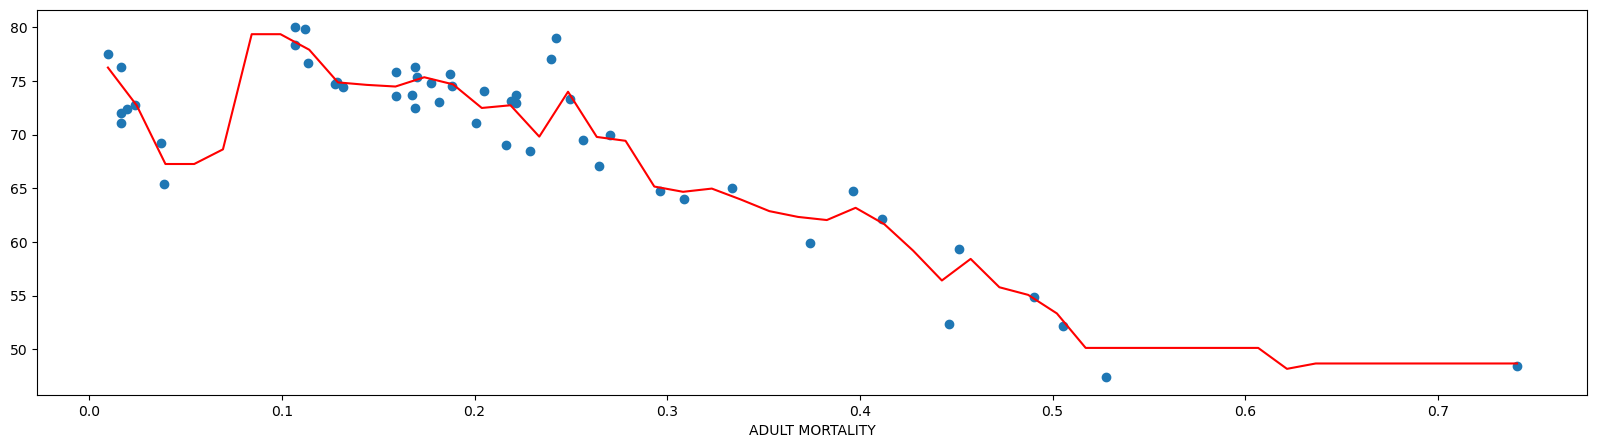

In [7]:
# fit the model to the Adult Mortality Feature
X_b = X_train[:50,2].reshape(-1,1)
y_b = y_train[:50]
bagging_dt.fit(X_b, y_b)
X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = bagging_dt.predict(X_new)
plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('ADULT MORTALITY')

# 2. Bagging with KNN

In [8]:
# Train and evaluate a BaggingRegressor with KNN as the base estimator
bagging_knn = BaggingRegressor(base_estimator=KNeighborsRegressor(), n_estimators=10)
bagging_knn.fit(X_train, y_train)
y_bagging_knn_pred = bagging_knn.predict(X_test)
print('Train score: %.4f'%bagging_knn.score(X_train, y_train))
print('Test score: %.4f'%bagging_knn.score(X_test, y_test))
print('MSE: {:.4f}'.format(metrics.mean_squared_error(y_test, y_bagging_knn_pred)))
print('R2_Score:{:.4f}'.format(r2_score(y_test, y_bagging_knn_pred)))

Train score: 0.9307
Test score: 0.8702
MSE: 11.5802
R2_Score:0.8702


Text(0.5, 0, 'ADULT MORTALITY')

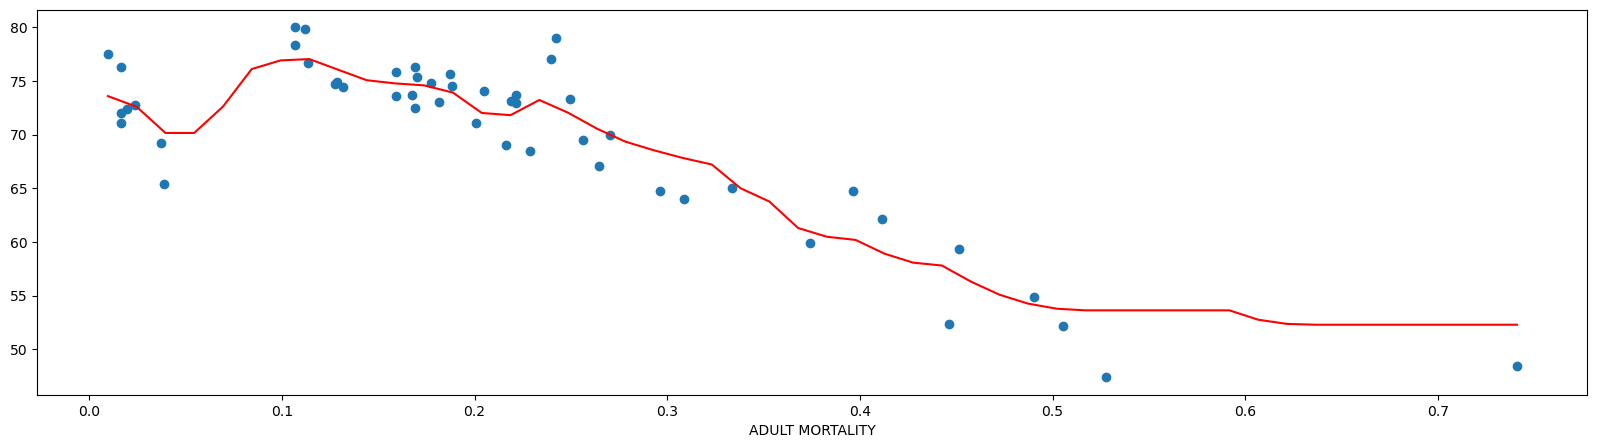

In [9]:
# fit the model
bagging_knn.fit(X_b, y_b)
X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = bagging_knn.predict(X_new)
plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('ADULT MORTALITY')

# 3. Pasting with Decision Tree Regressor

In [10]:
# create the Pasting Regressor model
pasting_reg_dtree = BaggingRegressor(DecisionTreeRegressor(), 
                           bootstrap= False,
                           max_features=0.5 ,
                           max_samples=0.5 ,
                           n_estimators= 10)
pasting_reg_dtree.fit(X_train, y_train)
y_pasting_dtree_pred = pasting_reg_dtree.predict(X_test)
print('Train score: %.4f'%pasting_reg_dtree.score(X_train, y_train))
print('Test score: %.4f'%pasting_reg_dtree.score(X_test, y_test))
print('MSE: {:.4f}'.format(metrics.mean_squared_error(y_test, y_pasting_dtree_pred)))
print('R2_Score:{:.4f}'.format(r2_score(y_test, y_pasting_dtree_pred)))

Train score: 0.9804
Test score: 0.9394
MSE: 5.4044
R2_Score:0.9394


Text(0.5, 0, 'ADULT MORTALITY')

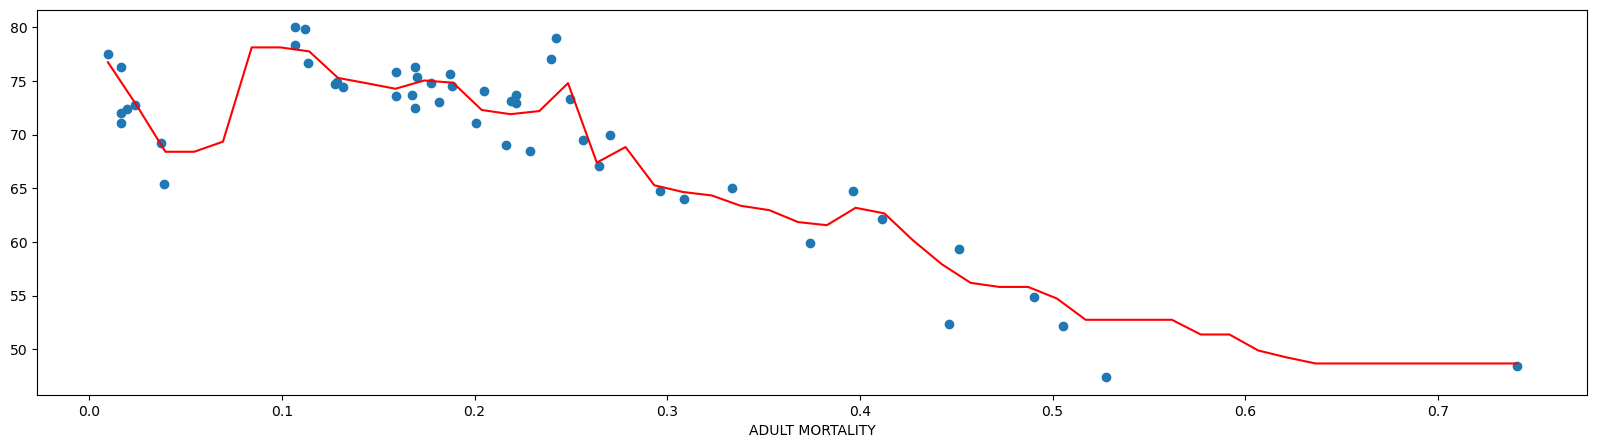

In [12]:
# fit the model
pasting_reg_dtree.fit(X_b, y_b)
X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = pasting_reg_dtree.predict(X_new)
plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('ADULT MORTALITY')

# 4. Pasting with KNN Regressor

In [13]:
# create the Pasting KNN Regressor model
knn = KNeighborsRegressor(n_neighbors=3, p=1, weights='distance')
pasting_knn = BaggingRegressor(base_estimator=knn, n_estimators=10, max_samples=0.8)
pasting_knn.fit(X_train, y_train)
y_pasting_knn_pred = pasting_knn.predict(X_test)
print('Train score: %.4f'%pasting_knn.score(X_train, y_train))
print('Test score: %.4f'%pasting_knn.score(X_test, y_test))
print('MSE: {:.4f}'.format(metrics.mean_squared_error(y_test, y_pasting_knn_pred)))
print('R2_Score:{:.4f}'.format(r2_score(y_test, y_pasting_knn_pred)))

Train score: 0.9833
Test score: 0.9282
MSE: 6.4084
R2_Score:0.9282


Text(0.5, 0, 'ADULT MORTALITY')

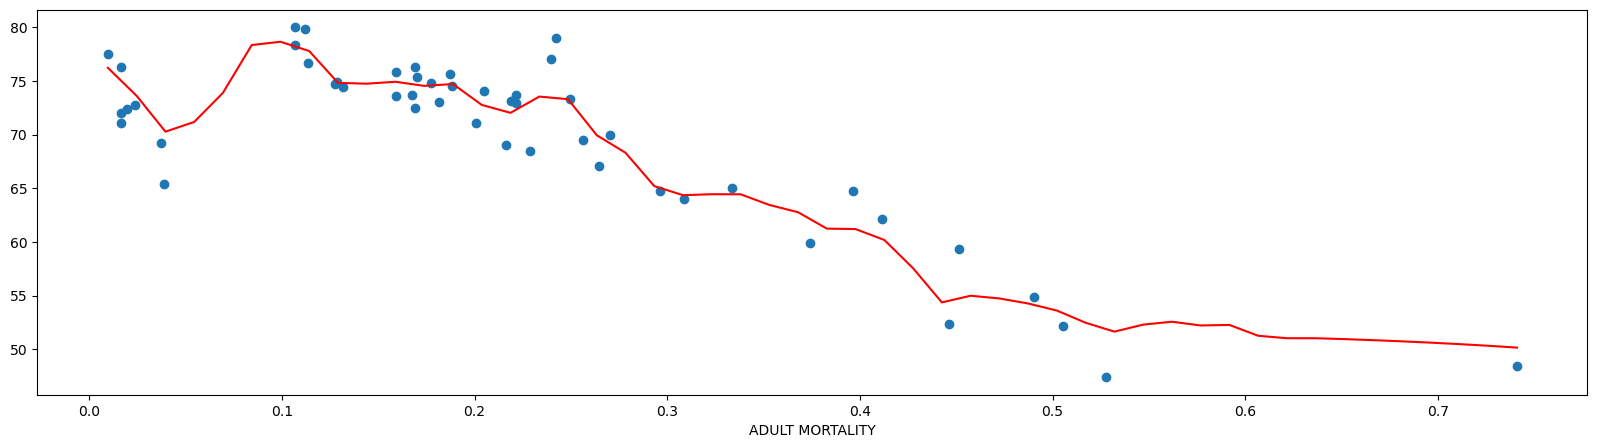

In [14]:
# fit the model
pasting_knn.fit(X_b, y_b)
X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = pasting_knn.predict(X_new)
plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('ADULT MORTALITY')

In [15]:
R2score_Bagging_DT = r2_score(y_test,y_bagging_dt_pred)
R2score_Bagging_KNN = r2_score(y_test,y_bagging_knn_pred)
R2score_Pasting_DT = r2_score(y_test,y_pasting_dtree_pred)
R2score_Pasting_KNN = r2_score(y_test,y_pasting_knn_pred)

MSE_Bagging_DT = mean_squared_error(y_test,y_bagging_dt_pred)
MSE_agging_KNN = mean_squared_error(y_test,y_bagging_knn_pred)
MSE_Pasting_DT =mean_squared_error(y_test,y_pasting_dtree_pred)
MSE_Pasting_KNN = mean_squared_error(y_test,y_pasting_knn_pred)

<Figure size 2000x1000 with 0 Axes>

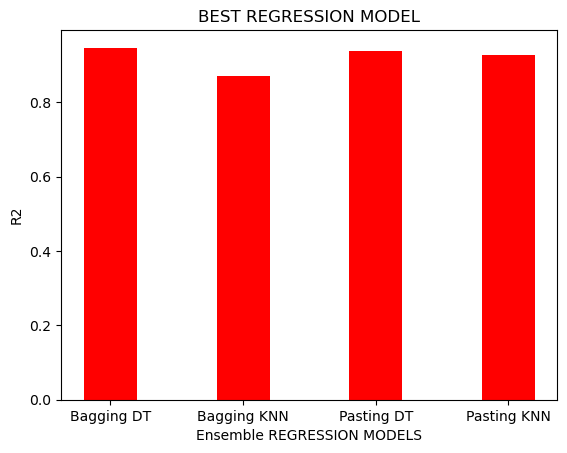

In [17]:
plt.figure(figsize=(20,10))
regs_i = 4
R2score_fin = [R2score_Bagging_DT, R2score_Bagging_KNN, R2score_Pasting_DT, R2score_Pasting_KNN]
fig, ax = plt.subplots()
index = np.arange(regs_i)
bar_width = 0.4
rects1 = plt.bar(index, R2score_fin, bar_width,
                    color='r',
                    label='R2 Score', align='center')
plt.xlabel('Ensemble REGRESSION MODELS')
plt.ylabel('R2')
plt.title('BEST REGRESSION MODEL')
plt.xticks(index, ('Bagging DT','Bagging KNN','Pasting DT','Pasting KNN'))
plt.show()

<Figure size 2000x1000 with 0 Axes>

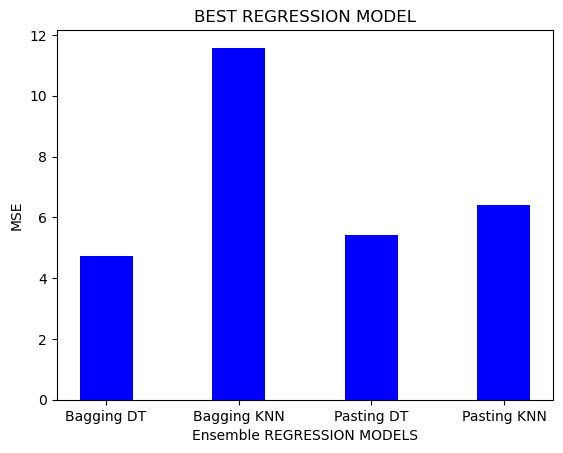

In [20]:
plt.figure(figsize=(20,10))
regs_i = 4
MSE_fin = [MSE_Bagging_DT, MSE_agging_KNN, MSE_Pasting_DT, MSE_Pasting_KNN]
fig, ax = plt.subplots()
index = np.arange(regs_i)
bar_width = 0.4
rects1 = plt.bar(index, MSE_fin, bar_width,
                    color='b',
                    label='MSE', align='center')
plt.xlabel('Ensemble REGRESSION MODELS')
plt.ylabel('MSE')
plt.title('BEST REGRESSION MODEL')
plt.xticks(index, ('Bagging DT','Bagging KNN','Pasting DT','Pasting KNN'))
plt.show()

Also there are other models which implement ensemble learning. 

# Random Forest Regressor

In [21]:
# train and evaluate a Random Forest Regressor
Random_forest = RandomForestRegressor(n_estimators=10)
Random_forest.fit(X_train, y_train)
y_pred_rf = Random_forest.predict(X_test)
print('Train score: %.4f'%Random_forest.score(X_train, y_train))
print('Test score: %.4f'%Random_forest.score(X_test, y_test))
print('MSE: {:.4f}'.format(metrics.mean_squared_error(y_test, y_pred_rf)))
print('R2_Score:{:.4f}'.format(r2_score(y_test, y_pred_rf)))

Train score: 0.9916
Test score: 0.9473
MSE: 4.7058
R2_Score:0.9473


Text(0.5, 0, 'ADULT MORTALITY')

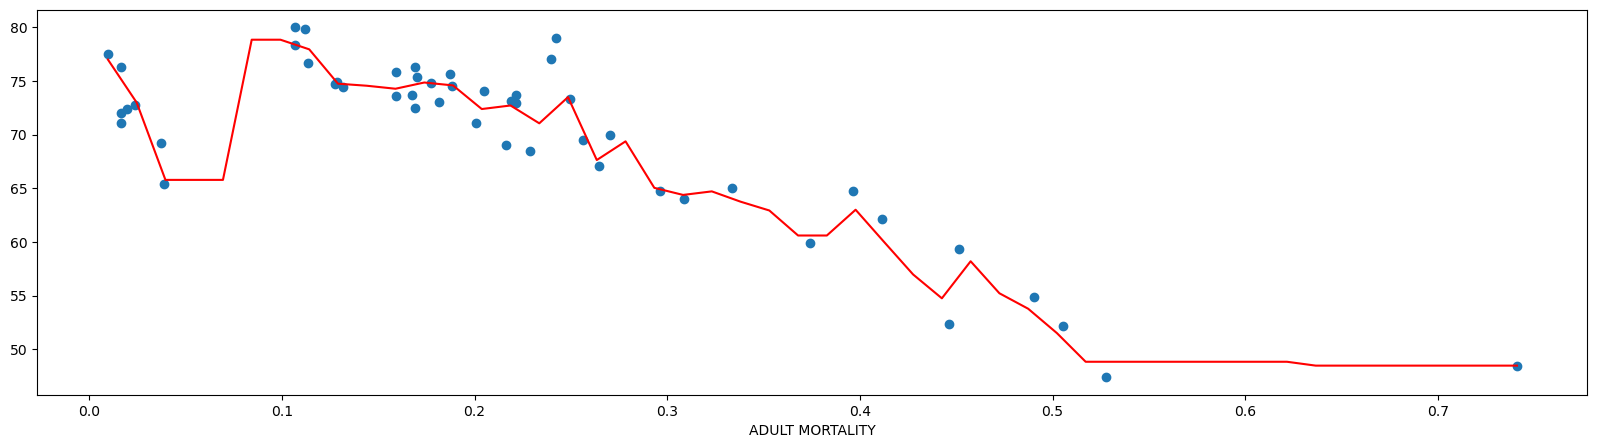

In [22]:
# fit the model
Random_forest.fit(X_b, y_b)
X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = Random_forest.predict(X_new)
plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('ADULT MORTALITY')

# Gradient Boosting Regressor

In [23]:
# train and evaluate a Gradient Boosting Regressor
gb = GradientBoostingRegressor(n_estimators=10)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print('Train score: %.4f'%gb.score(X_train, y_train))
print('Test score: %.4f'%gb.score(X_test, y_test))
print('MSE: {:.4f}'.format(metrics.mean_squared_error(y_test, y_pred_gb)))
print('R2_Score:{:.4f}'.format(r2_score(y_test, y_pred_gb)))

Train score: 0.7721
Test score: 0.7617
MSE: 21.2640
R2_Score:0.7617


Text(0.5, 0, 'ADULT MORTALITY')

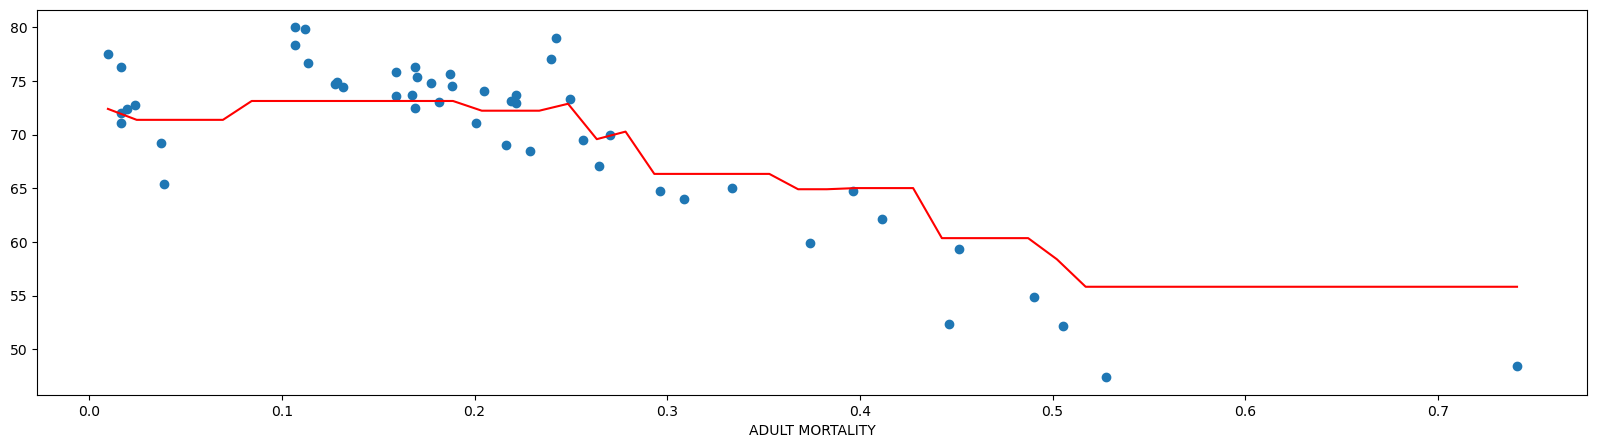

In [24]:
# fit the model
gb.fit(X_b, y_b)
X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = gb.predict(X_new)
plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('ADULT MORTALITY')